# Brain Stroke Prediction - Logistic Regression

## Background

A stroke is a medical condition in which poor blood flow to the brain causes cell death. There are two main types of stroke: ischemic, due to lack of blood flow, and hemorrhagic, due to bleeding. Both cause parts of the brain to stop functioning properly. 

Signs and symptoms of a stroke may include an inability to move or feel on one side of the body, problems understanding or speaking, dizziness, or loss of vision to one side. Signs and symptoms often appear soon after the stroke has occurred. If symptoms last less than one or two hours, the stroke is a transient ischemic attack (TIA), also called a mini-stroke. A hemorrhagic stroke may also be associated with a severe headache. The symptoms of a stroke can be permanent. Long-term complications may include pneumonia and loss of bladder control.

The **main risk factor** for stroke is **high blood pressure**. ***Other risk factors*** include ***high blood cholesterol, tobacco smoking, obesity, diabetes mellitus, a previous TIA, end-stage kidney disease, and atrial fibrillation***. 

**Prevention** includes ***decreasing risk factors***, surgery to open up the arteries to the brain in those with problematic carotid narrowing, and warfarin in people with atrial fibrillation. Aspirin or statins may be recommended by physicians for prevention.

### We want to predict if our patients' are at risk for stroke with the following identified factors.

### Attribute Information

    1) gender: "Male", "Female" or "Other"
    2) age: age of the patient
    3) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
    4) heartdisease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease 
    5) evermarried: "No" or "Yes"
    6) worktype: "children", "Govtjov", "Neverworked", "Private" or "Self-employed" 
    7) Residencetype: "Rural" or "Urban"
    8) avgglucoselevel: average glucose level in blood
    9) bmi: body mass index
    10) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
    11) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

### Initial Sample Size
4,981

### Filtered Sample Size (removed children)
4,158 (~ 17% decrease)

In [1]:
# Import dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from IPython.display import Image

## Extract Process

In [2]:
# Read data into dataframe
# Review stroke data - due to large sample count - likely want to view bins for 'age', 'bmi', & glucose levels

stroke_data = pd.read_csv('./Resources/full_data.csv')
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [3]:
# Describe df to view high-level mean age, avg glucose level, and bmi
stroke_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [4]:
# Review df info to look at Dtypes, range, column count, and null values - you will need to assist with LR
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


## Transform Process

In [5]:
# Validate there are no NaN (null) values
stroke_data.isnull().values.any()

False

In [6]:
# Validate Sample (row count)
len(stroke_data)

4981

In [7]:
# Filter df to view children - due to not likely having strokes - view count of children with risk/no risk of stroke
# Children also have different ranges for avg glucose level and bmi

child_filter = stroke_data[stroke_data['age'] < 18]
child_filter.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
205,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
208,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
210,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
237,Female,3.0,0,0,No,children,Urban,73.74,16.0,Unknown,0
239,Male,14.0,0,0,No,Govt_job,Urban,82.34,31.6,Unknown,0


In [8]:
# View stroke risk count for children to validate children significance in data 
# Are there a significant number of kids with stroke risk (1 = stroke risk, 0 = no stroke risk)

child_filter['stroke'].value_counts()

0    821
1      2
Name: stroke, dtype: int64

In [9]:
# initially filtered by work_type but better filter is to use age to capture adults only (age range >=18)
adult_age_filter = stroke_data[stroke_data['age'] >= 18]
adult_age_filter.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


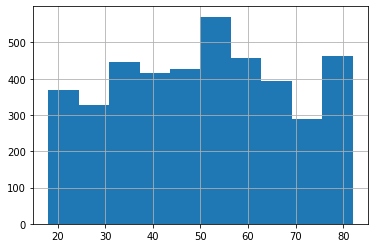

In [10]:
# Validate adults only (age >=18) to appear in df
hist = adult_age_filter['age'].hist(bins=10)
hist

In [11]:
# View shape for updated sample size

age_filtered = stroke_data[stroke_data['age'] >= 18]
age_filtered.shape

(4158, 11)

In [12]:
# View count aligns with other columns (index alignment)
age_filtered.count()

gender               4158
age                  4158
hypertension         4158
heart_disease        4158
ever_married         4158
work_type            4158
Residence_type       4158
avg_glucose_level    4158
bmi                  4158
smoking_status       4158
stroke               4158
dtype: int64

In [13]:
# Drop children in df
stroke_data_filtered = stroke_data.drop(stroke_data[stroke_data['age']< 18].index)
stroke_data_filtered.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [14]:
# Confirm shape with age_filtered data: 11 Columns and 4158 Rows 
shape = stroke_data_filtered.shape
print('\nDataFrame Shape :', shape)
print('\nNumber of rows (sample) :', shape[0])
print('\nNumber of columns :', shape[1])


DataFrame Shape : (4158, 11)

Number of rows (sample) : 4158

Number of columns : 11


### Blood Glucose Level Ranges

<img src="./Images/blood_glucose_chart.jpg" width=450 height=350/>

### BMI Ranges for Adults

For adults 20 years old and older, BMI is interpreted using standard weight status categories. These categories are the same for men and women of all body types and ages.

<img src="./Images/bmi_index.jpg" width=450 height=650/>

[BMI Index for Adults](https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html)

In [15]:
# Determine the number of unique values in each column to determine if we need to "bin" columns into categorical data.
# Bins: 
# age: <40 & 40+, 
# avg_glucose_level: 0 - 69 (Low), 70 - 99 (Normal), 100 - 125 (Pre-Diabetes), >126 (Diabetes)
# bmi: < 18.5 (Underweight), 18.5 - 24.9 (Healthy Weight), 24.0 - 29.9 (Overweight), > 30 (Obesity)

stroke_data_filtered.nunique()

gender                  2
age                    65
hypertension            2
heart_disease           2
ever_married            2
work_type               3
Residence_type          2
avg_glucose_level    3416
bmi                   317
smoking_status          4
stroke                  2
dtype: int64

In [16]:
# Use to view max rows in output
pd.set_option('display.max_rows', None)

In [17]:
# Create age bins
age_bins = [0, 40, 100]
labels = ["<40", "40+"]
stroke_data_filtered['age_bin'] = pd.cut(stroke_data_filtered['age'], bins=age_bins, labels=labels, right=False)
stroke_data_filtered.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_bin
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,40+
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,40+
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,40+
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,40+
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,40+


In [18]:
# Validate sample (row) count remain the same
stroke_data_filtered.shape

(4158, 12)

In [19]:
# Validate categorical age_bins - value count does not add up to 4,158 - are there null values
stroke_data_filtered['age_bin'].value_counts()

40+    2875
<40    1283
Name: age_bin, dtype: int64

In [20]:
# Determine if there are null values
stroke_data_filtered['age_bin'].isnull().values.any()

False

In [21]:
# Code to view null values
# nan_values = stroke_data_filtered[stroke_data_filtered['age_bin'].isna()]
# print (nan_values)

In [22]:
# Create avg_glucose level bins
# avg_glucose_level: 0 - 69 (Low), 70 - 99 (Normal), 100 - 125 (Pre-Diabetes), >126 (Diabetes)
glucose_bins = [0, 70,100, 126, 400]
g_labels = ["Low", "Normal", "Pre-Diabetes", "Diabetes"]
stroke_data_filtered['glucose_lvl_bins'] = pd.cut(stroke_data_filtered['avg_glucose_level'], 
                                                  bins=glucose_bins, labels=g_labels, right=False)
stroke_data_filtered.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_bin,glucose_lvl_bins
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,40+,Diabetes
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,40+,Pre-Diabetes
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,40+,Diabetes
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,40+,Diabetes
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,40+,Diabetes


In [23]:
# Validate sample (row) count remain the same
stroke_data_filtered.shape

# Validate categorical age_bins - value count does not add up to 4,158 - are there null values
stroke_data_filtered['glucose_lvl_bins'].value_counts()

# Determine if there are null values
stroke_data_filtered['age_bin'].isnull().values.any()

False

In [24]:
# Create bmi level bins
# bmi: < 18.5 (Underweight), 18.5 - 24.9 (Healthy Weight), 24.0 - 29.9 (Overweight), > 30 (Obesity)
bmi_bins = [0, 18.5,24.0, 30, 1000]
bmi_labels = ["Underweight", "Healthy Weight", "Overweight", "Obesity"]
stroke_data_filtered['bmi_bin'] = pd.cut(stroke_data_filtered['bmi'], 
                                                  bins=bmi_bins, labels=bmi_labels, right=False)
stroke_data_filtered.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_bin,glucose_lvl_bins,bmi_bin
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,40+,Diabetes,Obesity
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,40+,Pre-Diabetes,Obesity
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,40+,Diabetes,Obesity
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,40+,Diabetes,Overweight
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,40+,Diabetes,Overweight


In [25]:
# Validate sample (row) count remain the same
stroke_data_filtered.shape

# Validate categorical age_bins - value count does not add up to 4,158 - are there null values
stroke_data_filtered['bmi_bin'].value_counts()

# Determine if there are null values
stroke_data_filtered['bmi_bin'].isnull().values.any()

False

In [26]:
stroke_data_filtered.nunique()

gender                  2
age                    65
hypertension            2
heart_disease           2
ever_married            2
work_type               3
Residence_type          2
avg_glucose_level    3416
bmi                   317
smoking_status          4
stroke                  2
age_bin                 2
glucose_lvl_bins        4
bmi_bin                 4
dtype: int64

In [27]:
# Print df to csv file for visuals to Tableau
stroke_data_filtered.to_csv('./Resources/stroke_data.csv', encoding='utf-8', index=False)

### Model Building

In [28]:
# Drop 'age', 'avg_glucose_level', & 'bmi' for Logistic Regression and Prediction Accuracy
# Drop the non-beneficial columns, 'age', 'avg_glucose_level', and 'bmi'.
model_df = stroke_data_filtered.drop(['age', 'avg_glucose_level','bmi'],
                                     axis=1)
model_df.head()


,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,age_bin,glucose_lvl_bins,bmi_bin
0,Male,0,1,Yes,Private,Urban,formerly smoked,1,40+,Diabetes,Obesity
1,Male,0,1,Yes,Private,Rural,never smoked,1,40+,Pre-Diabetes,Obesity
2,Female,0,0,Yes,Private,Urban,smokes,1,40+,Diabetes,Obesity
3,Female,1,0,Yes,Self-employed,Rural,never smoked,1,40+,Diabetes,Overweight
4,Male,0,0,Yes,Private,Urban,formerly smoked,1,40+,Diabetes,Overweight


In [29]:
# Display unique value count by column
model_df.nunique()

gender              2
hypertension        2
heart_disease       2
ever_married        2
work_type           3
Residence_type      2
smoking_status      4
stroke              2
age_bin             2
glucose_lvl_bins    4
bmi_bin             4
dtype: int64

In [30]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4158 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            4158 non-null   object  
 1   hypertension      4158 non-null   int64   
 2   heart_disease     4158 non-null   int64   
 3   ever_married      4158 non-null   object  
 4   work_type         4158 non-null   object  
 5   Residence_type    4158 non-null   object  
 6   smoking_status    4158 non-null   object  
 7   stroke            4158 non-null   int64   
 8   age_bin           4158 non-null   category
 9   glucose_lvl_bins  4158 non-null   category
 10  bmi_bin           4158 non-null   category
dtypes: category(3), int64(3), object(5)
memory usage: 305.0+ KB


In [31]:
model_df_2 = model_df[['gender','age_bin','hypertension', 'heart_disease', 'ever_married', 'work_type', 
                      'Residence_type', 'smoking_status', 'glucose_lvl_bins', 'bmi_bin', 'stroke']]
model_df_2.head()
# model_df_2.shape

,gender,age_bin,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,glucose_lvl_bins,bmi_bin,stroke
0,Male,40+,0,1,Yes,Private,Urban,formerly smoked,Diabetes,Obesity,1
1,Male,40+,0,1,Yes,Private,Rural,never smoked,Pre-Diabetes,Obesity,1
2,Female,40+,0,0,Yes,Private,Urban,smokes,Diabetes,Obesity,1
3,Female,40+,1,0,Yes,Self-employed,Rural,never smoked,Diabetes,Overweight,1
4,Male,40+,0,0,Yes,Private,Urban,formerly smoked,Diabetes,Overweight,1


In [32]:
model_df_2['stroke'].value_counts()

0    3912
1     246
Name: stroke, dtype: int64

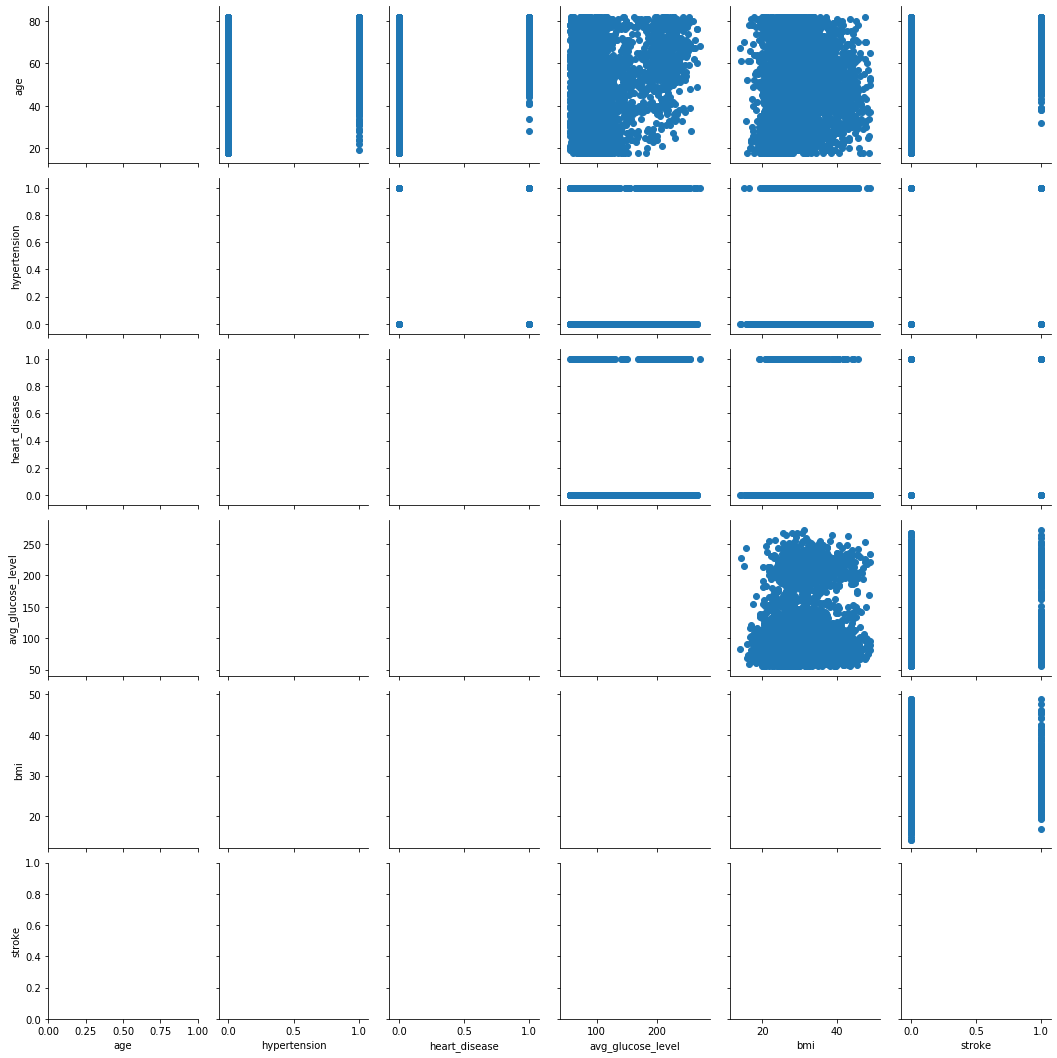

In [33]:
# Correlation Matrix to make all scatter plots at once

# importing seaborn package
import seaborn
  
# Create a grid of column pairs with scatter plots for non-diagonal(upper portion)
seaborn.PairGrid(stroke_data_filtered).map_upper(plt.scatter)